# Basic Terms

null hypothesis- states that there is no correlation among two variables<br>
alternate hypothesis- states that there is correlation among two variables<br>
<br>
p value- determines that if it is 0.10 then we will be incorrectly rejecting null hypothesis 10 in 100 times &
will be correct in accepting alternate hypothesis 90 times in 100<br>
p value<0.05- null hypothesis is to be rejected<br>
p value>0.05- null hypothesis is correct that there is no correlation among the two variables<br>
<br>
sample = small subsets of a large dataset<br>
groups = various categories of a single feature/target<br>
<br>
F = variation among sample means/variation within groups<br>
<br>
variation among groups is large - it means that various groups are overlapping & hence 
variation among sample means can be negligible or null hypothesis is true<br>
<br>
variation among groups is small - it means variation among sample means dominates and p will be <= 0.05<br>
<br>
overall F score is high and p is low -> null hypothesis is rejected<br>
<br>
type1 error: wrongly reject the null hypothesis and accept the alternate hypothesis<br>

# 1. pearson correlation coefficient (r)
* varies from -1 to 1. 
* when r<0 -  negative linear relationship
* when r>0 - positive linear relationship
* when r close to 0- weak linear relationship
* when r close to +-1 then strong linear relationship'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import scipy
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("data/abalone.csv", low_memory=False)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<b>Name	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	Data Type	&nbsp;	Description<br></b>
Sex		&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;&nbsp;	&nbsp;&nbsp;nominal	&nbsp;	&nbsp;	&nbsp;	&nbsp;			M, F, and I (infant)<br>
	Length	&nbsp;		&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;&nbsp;	&nbsp;	continuous	&nbsp;Longest shell measurement<br>
	Diameter		&nbsp;	&nbsp;	&nbsp;	&nbsp;&nbsp;	&nbsp;&nbsp;	continuous	&nbsp;	perpendicular to length<br>
	Height				&nbsp;	&nbsp;&nbsp;	&nbsp;	&nbsp;	&nbsp;&nbsp;	&nbsp;&nbsp;	continuous	&nbsp;	with meat in shell<br>
	Whole weight				&nbsp;&nbsp;	&nbsp;&nbsp;continuous	&nbsp;	whole abalone<br>
	Shucked weight		&nbsp;&nbsp;	continuous	&nbsp;	weight of meat<br>
	Viscera weight			&nbsp;&nbsp;	continuous	&nbsp;	gut weight (after bleeding)<br>
	Shell weight		&nbsp;	&nbsp;	&nbsp;	&nbsp;&nbsp;continuous	&nbsp;	after being dried<br>
	Rings		&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;	&nbsp;&nbsp;	integer				&nbsp;	&nbsp;&nbsp;+1.5 gives the age in years

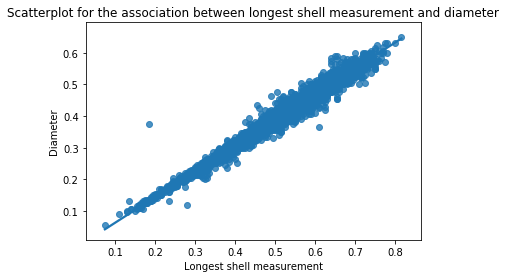

association between Length and Diameter
(0.9868115846024932, 0.0)
association between Whole weight and Length
(0.9252611721489451, 0.0)


In [12]:
data.Length = pd.to_numeric(data.Length, errors='coerce')
data.Diameter = pd.to_numeric(data.Diameter, errors='coerce')
data.Rings = pd.to_numeric(data.Rings, errors='coerce')

scat1 = sn.regplot(x="Length", y="Diameter", fit_reg=True, data=data)
plt.xlabel("Longest shell measurement")
plt.ylabel("Diameter")
plt.title("Scatterplot for the association between longest shell measurement and diameter")
plt.show()
data_clean = data.dropna()

print("association between Length and Diameter")
print(scipy.stats.pearsonr(data_clean['Length'], data_clean['Diameter']))

print("association between Whole weight and Length")
print(scipy.stats.pearsonr(data_clean['Whole weight'], data_clean['Length']))


value1 = pearson correlation coefficient = r<br>
r^2 = gives an idea that explanatory variable alone can predict this much of variability of response variable<br>
value2 = p value

# 2. ANOVA - ANalysis Of VAriance 
when feature is quantitative and target is categorical 
we need to also see if there is any moderator i.e. if any particular feature is affecting the correlation between the
two variables

In [14]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [17]:
data = pd.read_csv("data/abalone.csv", low_memory=False)

ols: ordinary least square<br>
using the ols function for calculating F-statistic and associated p value <br>
explanatory variable -> Rings <br>
here C() is to indicate that variable is categorical <br>
Df of residuals and models relates to the degrees of freedom — the number of values in the final calculation of a statistic that are free to vary.<br>
*R-squared* — the percentage of variance our model explains<br>
for multiple features use 'Rings ~ C(Sex) + features...'

In [18]:
model = smf.ols(formula='Rings ~ C(Sex)', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     499.3
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          3.72e-195
Time:                        15:11:07   Log-Likelihood:                -10368.
No. Observations:                4177   AIC:                         2.074e+04
Df Residuals:                    4174   BIC:                         2.076e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1293      0.080    138.888      

In [27]:
print('means for Rings by Sex')
m1 = data.groupby('Sex').mean()[['Rings']]
print(m1)

print('\nstandard deviation for Rings by Sex')
sd1 = data.groupby('Sex').std()[['Rings']]
print(sd1)

means for Rings by Sex
         Rings
Sex           
F    11.129304
I     7.890462
M    10.705497

standard deviation for Rings by Sex
        Rings
Sex          
F    3.104256
I    2.511554
M    3.026349


comparing the p value to be less than 0.05 and good variation in the mean of three types of categories we conclude that null hypothesis can be rejected

In [29]:
mc = multi.MultiComparison(data['Rings'], data['Sex'])
res = mc.tukeyhsd()
print(res.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     F      I  -3.2388 0.001 -3.5028 -2.9749   True
     F      M  -0.4238 0.001 -0.6797 -0.1679   True
     I      M    2.815 0.001  2.5609  3.0691   True
---------------------------------------------------


when there are more that 2 categories in a categorical variable then we use post hoc test for annova

# 3. chi square test 
chi-square value threshold - for a 2 by 2 case: 3.84 is considered large
so this square should be higher for null hypothesis to be rejected <br>
p value threshold - 0.05

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data/mushrooms.csv", low_memory=False)
data.head()

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [23]:
# contingency table of observed counts
ct1=pd.crosstab(data['edible'], data['habitat'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print('\n',colpct)

# chi-square
print ('\nchi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

habitat     d     g    l    m     p    u    w
edible                                       
e        1880  1408  240  256   136   96  192
p        1268   740  592   36  1008  272    0

 habitat         d         g         l         m         p        u    w
edible                                                                 
e        0.597205  0.655493  0.288462  0.876712  0.118881  0.26087  1.0
p        0.402795  0.344507  0.711538  0.123288  0.881119  0.73913  0.0

chi-square value, p value, expected counts
(1573.7772608252621, 0.0, 6, array([[1630.57410143, 1112.60265879,  430.95224028,  151.24766125,
         592.55933038,  190.61349089,   99.45051699],
       [1517.42589857, 1035.39734121,  401.04775972,  140.75233875,
         551.44066962,  177.38650911,   92.54948301]]))


In [22]:
# contingency table of observed counts
ct1=pd.crosstab(data['edible'], data['population'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum

# chi-square
print ('\nchi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

population    a    c    n    s     v     y
edible                                    
e           384  288  400  880  1192  1064
p             0   52    0  368  2848   648

chi-square value, p value, expected counts
(1929.7408909028088, 0.0, 5, array([[ 198.90103397,  176.1102905 ,  207.18857706,  646.42836041,
        2092.60462826,  886.7671098 ],
       [ 185.09896603,  163.8897095 ,  192.81142294,  601.57163959,
        1947.39537174,  825.2328902 ]]))


In [21]:
# contingency table of observed counts
ct1=pd.crosstab(data['edible'], data['stalk-shape'])
print(ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print ('\nchi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

stalk-shape     e     t
edible                 
e            1616  2592
p            1900  2016
stalk-shape         e       t
edible                       
e            0.459613  0.5625
p            0.540387  0.4375

chi-square value, p value, expected counts
(84.14203826548719, 4.604746212155192e-20, 1, array([[1821.18759232, 2386.81240768],
       [1694.81240768, 2221.18759232]]))


# 4. Kolmogorov-Smirnov statistic on 2 samples

This tests whether 2 samples are drawn from the same distribution. The distribution is assumed to be continuous.<br>
If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("data/abalone.csv", low_memory=False)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
st.ks_2samp(data['Height'], data['Diameter'])

Ks_2sampResult(statistic=0.9384725879818051, pvalue=0.0)

# 5. Variance Inflation Factor (VIF)
VIF score of an independent variable represents how well the variable is explained by other independent variables

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
data = pd.read_csv("data/abalone.csv", low_memory=False)
data.head()
data.drop(columns=['Sex', 'Rings'], inplace=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
# Calculating VIF
vif = pd.DataFrame()
vif["variables"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif)

        variables         VIF
0          Length  695.083714
1        Diameter  748.879248
2          Height   42.117537
3    Whole weight  421.579746
4  Shucked weight  101.575906
5  Viscera weight   63.348265
6    Shell weight   81.772105


In [55]:
data = data.drop(columns=['Diameter', 'Length', 'Whole weight', 'Shucked weight'])
vif = pd.DataFrame()
vif["variables"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif)

        variables        VIF
0          Height   9.918570
1  Viscera weight  21.814535
2    Shell weight  24.915133


In [56]:
data = data.drop(columns=['Shell weight'])
vif = pd.DataFrame()
vif["variables"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif)

        variables      VIF
0          Height  8.29806
1  Viscera weight  8.29806
